<a href="https://colab.research.google.com/github/MikeDeecode/KC-properties-price-analysis/blob/master/kc_properties_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**KINGS COUNTY, WASHINGTON STATE, USA HOUSE SALES DATA**

**The aim of this project:**

* To detemine the features that affects the price of the house 
* How well the features affect the price of the house 
* Develop a regression model to predict the prices of new houses 
* To obtain valuable insights and improve the pricing of properties 

##**Exploratory Analysis**

Import the required libraries 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

print("Setup complete")

Setup complete


In [9]:
kc_properties = pd.read_csv("/content/kc_house_data.csv")
print("Success")

Success


In [10]:
kc_properties.shape

(21613, 21)

* There are 21,613 rows (houses) and 21 columns (features) in this data 

In [11]:
kc_properties.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**DESCRIPTION OF THE DATA**

**Below is a brief description of the columns in the data**

* **id** - the identification number of the house
* **date** - the date the house was sold 
* **price** - the predicted price of the house 
* **bedrooms** - th e number of bedrooms in the house
* **bathrooms** - the numbe rof bathrooms in the house 
* **sqft_living** - square footage of the house 
* **sqft_lot**- square footage of the parking lot 
* **floors** - total numbe rof floors in the house 
* **waterfront**- If the house has a waterfront view (1 for yes)
* **view** - how many times the house has been viewed 
* **condition** - How good the condition of the house is (5 is excellent)
* **grade** - overall grade given to the house based on Kings County standards (13 is excellent)
* **sqft_above** - square footage of the house apart from basement 
* **sqft_basement** - square footage of the basement 
* **yr_built** - the year the house was built 
* **yr_renovated** - Year the house was renovated 
* **zipcode** - ZIP of the house 
* **lat** - latitude of the house 
* **long** - lobgitude of the house 
* **sqft_living15** - living room area in 2015 (if there has been renovations)
* **sqft_lot15** - parking lot area in 2015 (if there has been renovations)

In [12]:
kc_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

The data is clean for analysis 

There are no missing values 

Lets proceed to see how each of the features affects the price 

###BEDROOMS

**HOUSES BY NUMBER OF ROOMS**

In [45]:
bedrooms_grp = kc_properties.groupby('bedrooms', as_index = False)['id'].count()
bedrooms_grp.rename(columns = {'id': 'No of houses', 'bedrooms':'No of bedrooms'}, inplace = True)
bedroom_grp = bedrooms_grp.sort_values('No of houses', ascending = False)
bedroom_grp

,No of bedrooms,No of houses
3,3,9824
4,4,6882
2,2,2760
5,5,1601
6,6,272
1,1,199
7,7,38
0,0,13
8,8,13
9,9,6


* Most of the houses in Kings county has 3 bedrooms 

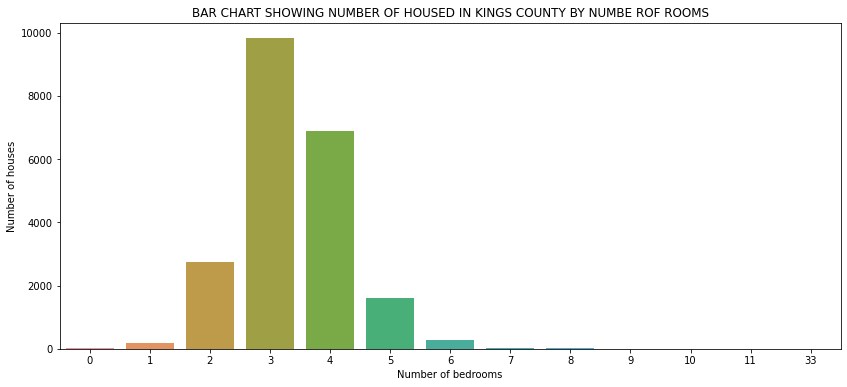

In [7]:
plt.figure(figsize = (14, 6))
plt.title("BAR CHART SHOWING NUMBER OF HOUSED IN KINGS COUNTY BY NUMBE ROF ROOMS")
sns.countplot('bedrooms', data = kc_properties)
plt.xlabel("Number of bedrooms")
plt.ylabel("Number of houses")
plt.show()

* The bar chart shows that most houses have 3 bedroo followed by 4 bedrooms 

**HOW NUMBER OF BEDROOMS AFFECT THE PRICING OF THE HOUSES**

In [46]:
room_grp = kc_properties.groupby('bedrooms', as_index = False)['price'].mean()
room_grp.rename(columns = {'price': 'Average price', 'bedrooms': 'No of bedrooms' }, inplace = True)
room_grp = room_grp.sort_values('Average price', ascending = False)
room_grp

,No of bedrooms,Average price
8,8,1.105077e+06
7,7,9.511847e+05
9,9,8.939998e+05
6,6,8.255206e+05
10,10,8.193333e+05
5,5,7.865998e+05
12,33,6.400000e+05
4,4,6.354195e+05
11,11,5.200000e+05
3,3,4.662321e+05


* Houses with 8 bedrooms have the highest average price in Kings county

In [ ]:
plt.figure(figsize = (14, 6))
sns.boxplot('price', 'bedrooms', data = kc_properties)